In [3]:
import pandas as pd 
import numpy as np 
import pyodbc 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-DA8VTGF\SQLEXPRESS;'
    'DATABASE=CHESS;'
    'Trusted_Connection=yes;'
)


In [5]:
conn = pyodbc.connect(conn_str)

In [6]:
query = "SELECT * FROM dbo.shopping_trends"
data = pd.read_sql(query ,conn)
data

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [5]:
data.duplicated().sum()

0

In [9]:
data.drop("Customer_ID" , axis=1 , inplace=True) 
data .head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [25]:
data.shape

(3900, 18)

In [26]:
data.columns

Index(['Age', 'Gender', 'Item_Purchased', 'Category', 'Purchase_Amount_USD',
       'Location', 'Size', 'Color', 'Season', 'Review_Rating',
       'Subscription_Status', 'Payment_Method', 'Shipping_Type',
       'Discount_Applied', 'Promo_Code_Used', 'Previous_Purchases',
       'Preferred_Payment_Method', 'Frequency_of_Purchases'],
      dtype='object')

In [27]:
data.columns.nunique()

18

In [7]:
data.isna().sum()

Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [9]:
for col in data.columns:
    print(col ,":")
    Min = data[col].min()
    Max = data[col].max()

    print("the max:" , Max) 
    print("------------------")
    print("the min:" , Min)

Age :
the max: 70
------------------
the min: 18
Gender :
the max: Male
------------------
the min: Female
Item_Purchased :
the max: T-shirt
------------------
the min: Backpack
Category :
the max: Outerwear
------------------
the min: Accessories
Purchase_Amount_USD :
the max: 100
------------------
the min: 20
Location :
the max: Wyoming
------------------
the min: Alabama
Size :
the max: XL
------------------
the min: L
Color :
the max: Yellow
------------------
the min: Beige
Season :
the max: Winter
------------------
the min: Fall
Review_Rating :
the max: 5.0
------------------
the min: 2.5
Subscription_Status :
the max: Yes
------------------
the min: No
Payment_Method :
the max: Venmo
------------------
the min: Bank Transfer
Shipping_Type :
the max: Store Pickup
------------------
the min: 2-Day Shipping
Discount_Applied :
the max: Yes
------------------
the min: No
Promo_Code_Used :
the max: Yes
------------------
the min: No
Previous_Purchases :
the max: 50
-----------------

In [10]:
data.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


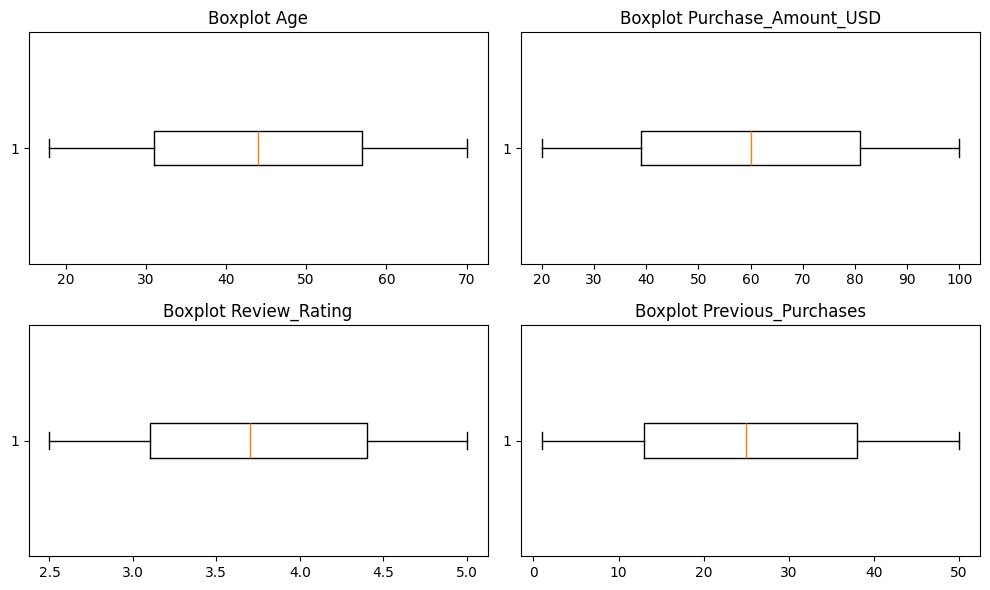

In [15]:
numerical_colunms = ["Age","Purchase_Amount_USD","Review_Rating","Previous_Purchases"]
plt.figure(figsize=(10,6)) 
for i, feature in enumerate(numerical_colunms, 1):
    plt.subplot(2, 2, i) 
    plt.boxplot(data[feature], vert=False)
    plt.title(f"Boxplot {feature}")

plt.tight_layout()
plt.show()



In [16]:
data.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [17]:
data.Age.min()

18

In [18]:
data.Age.max()

70

In [19]:
data.Age.mean()

44.06846153846154

In [20]:
data.Age.std()

15.207589127162382

<Axes: ylabel='Frequency'>

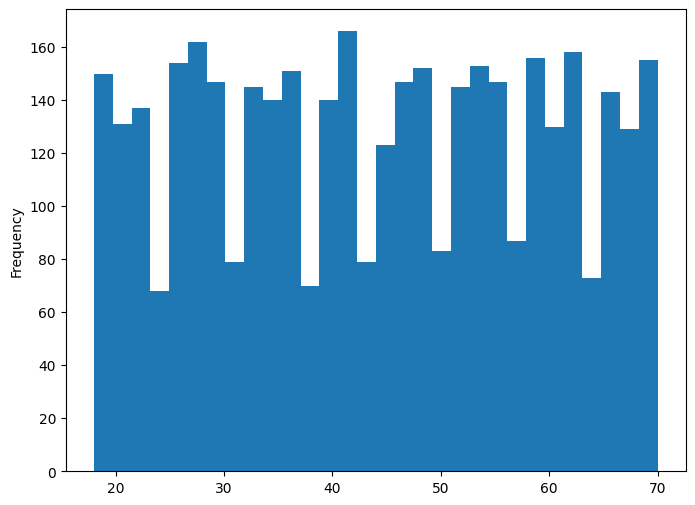

In [39]:
data['Age'].plot(kind='hist', bins=30, figsize=(8, 6))

In [28]:
data.Gender.value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

<Axes: xlabel='Gender'>

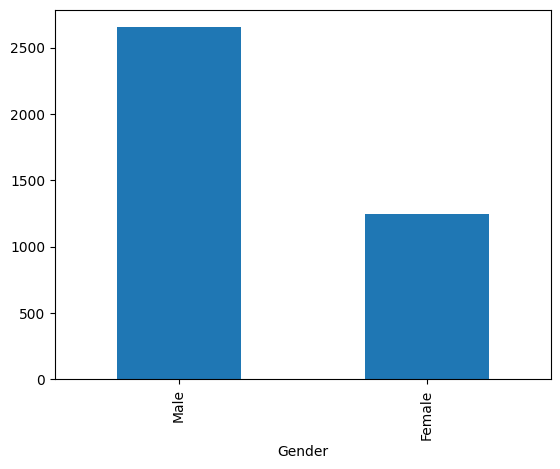

In [29]:
data.Gender.value_counts().plot(kind="bar")

In [30]:
data.Item_Purchased.value_counts()

Item_Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

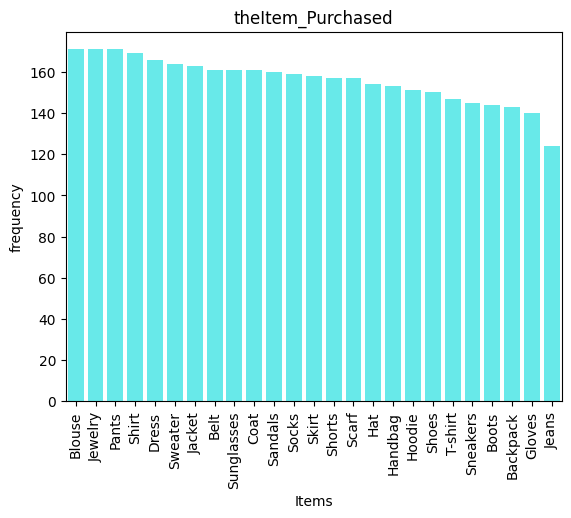

In [44]:
plt.Figure(figsize=(10,8))
sns.barplot(data["Item_Purchased"].value_counts(),color="#52ffff")
plt.title("theItem_Purchased")
plt.xlabel("Items")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

In [45]:
data.Category.value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

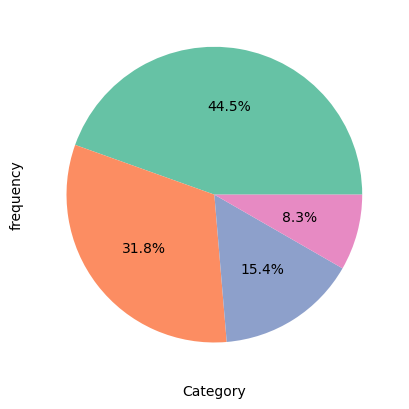

In [74]:
plt.Figure(figsize=(15,10))
plt.pie(data.Category.value_counts()  ,autopct="%0.1f%%")
plt.xlabel("Category")
plt.ylabel("frequency")
plt.show()


In [51]:
data.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [52]:
data["Purchase_Amount_USD"].min()

20

In [53]:
data["Purchase_Amount_USD"].max()

100

In [54]:
data["Purchase_Amount_USD"].mean()

59.76435897435898

In [56]:
data.Location.value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

In [57]:
data.Size.value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

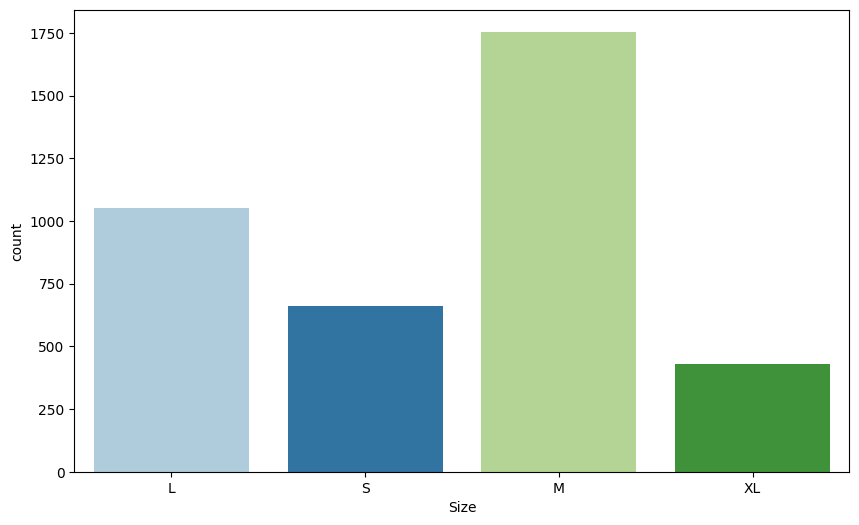

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Size', data=data, palette=sns.color_palette("Paired"))

plt.show()

In [64]:
data.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [65]:
data.Color.value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

<Axes: xlabel='Color'>

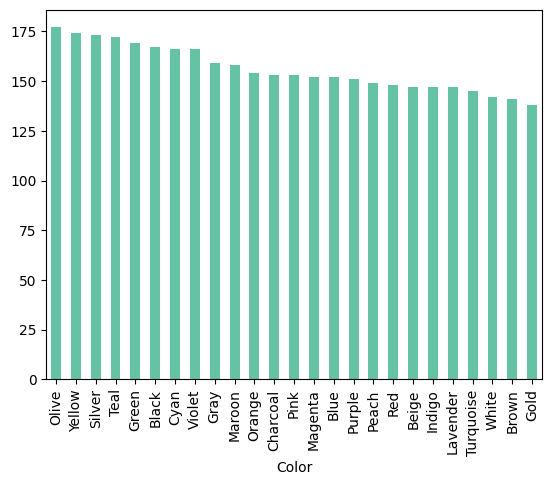

In [67]:
data.Color.value_counts().plot(kind="bar" )

In [68]:
data.Season.value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

<Axes: ylabel='count'>

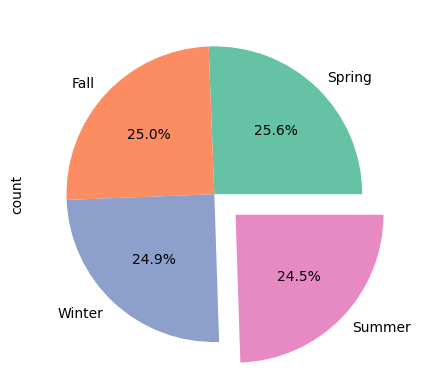

In [72]:
data.Season.value_counts().plot(kind="pie", autopct="%0.1f%%" , explode=[0, 0,0,0.2])

In [76]:
data.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [75]:
data.Review_Rating.max()

5.0

In [77]:
data.Review_Rating.min()

2.5

In [78]:
data.Review_Rating.mean()

3.7499487182421563

In [79]:
data.Review_Rating.std()

0.7162228212770698

In [80]:
data.Subscription_Status.value_counts()

Subscription_Status
No     2847
Yes    1053
Name: count, dtype: int64

<Axes: xlabel='Subscription_Status'>

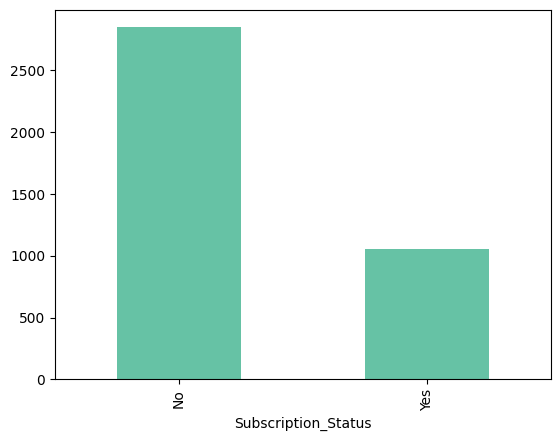

In [81]:
data.Subscription_Status.value_counts().plot(kind="bar")

In [82]:
data.Payment_Method.value_counts()

Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

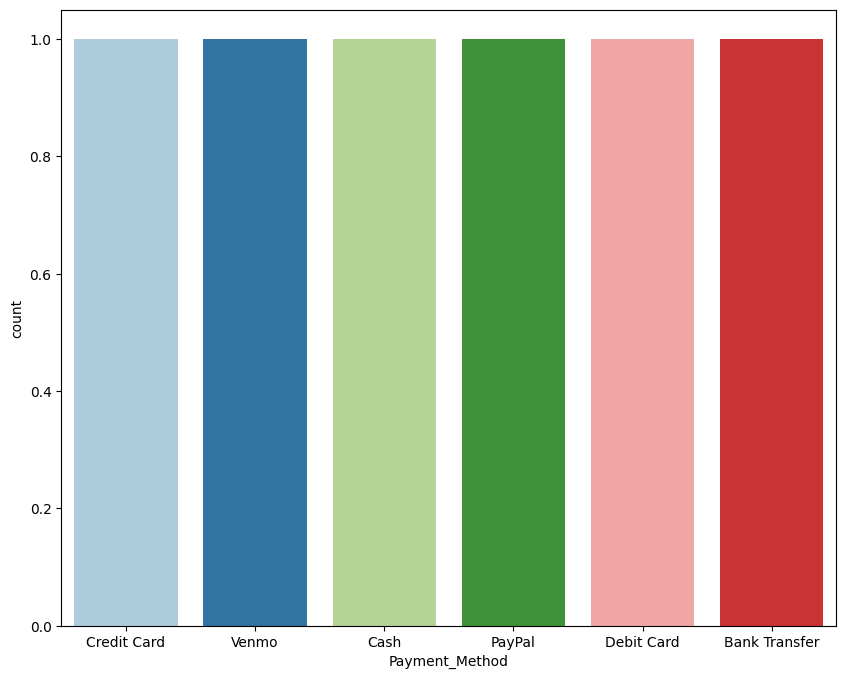

In [87]:
plt.figure(figsize=(10,8))
sns.countplot(data.Payment_Method.value_counts() , palette=sns.color_palette("Paired"))
plt.show()

In [88]:
data.Shipping_Type.value_counts()

Shipping_Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

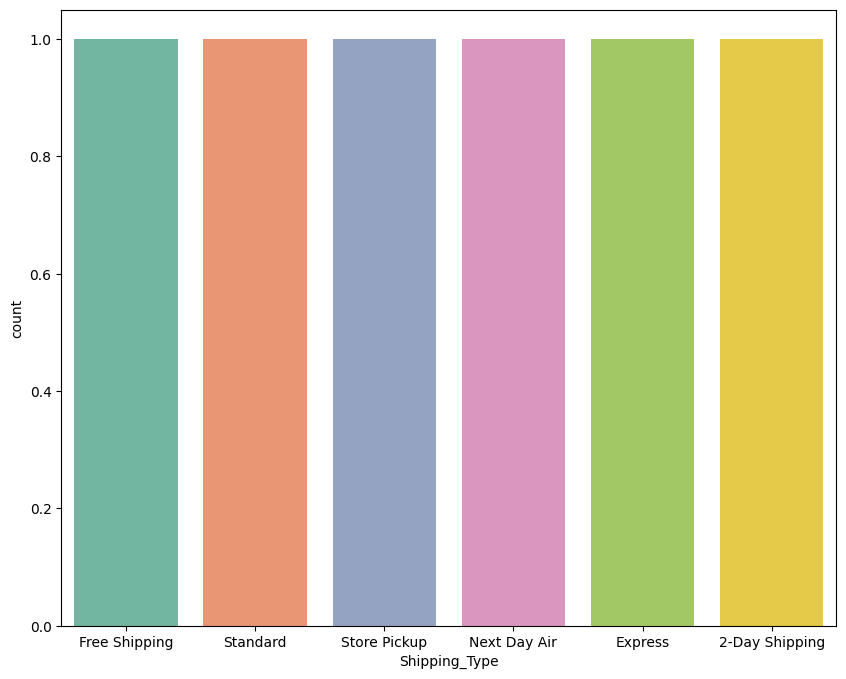

In [92]:
plt.figure(figsize=(10,8))
sns.countplot(data.Shipping_Type.value_counts() , palette=sns.color_palette("Set2"))
plt.show()

In [93]:
data.Discount_Applied.value_counts()

Discount_Applied
No     2223
Yes    1677
Name: count, dtype: int64

In [94]:
data.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [95]:
data.Promo_Code_Used.value_counts()

Promo_Code_Used
No     2223
Yes    1677
Name: count, dtype: int64

In [96]:
data.Previous_Purchases.min()

1

In [97]:
data.Previous_Purchases.max()

50

In [98]:
data.Previous_Purchases .mean()

25.35153846153846

In [99]:
data.Previous_Purchases.std()

14.447125170462309

In [100]:
data.Preferred_Payment_Method.value_counts()

Preferred_Payment_Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

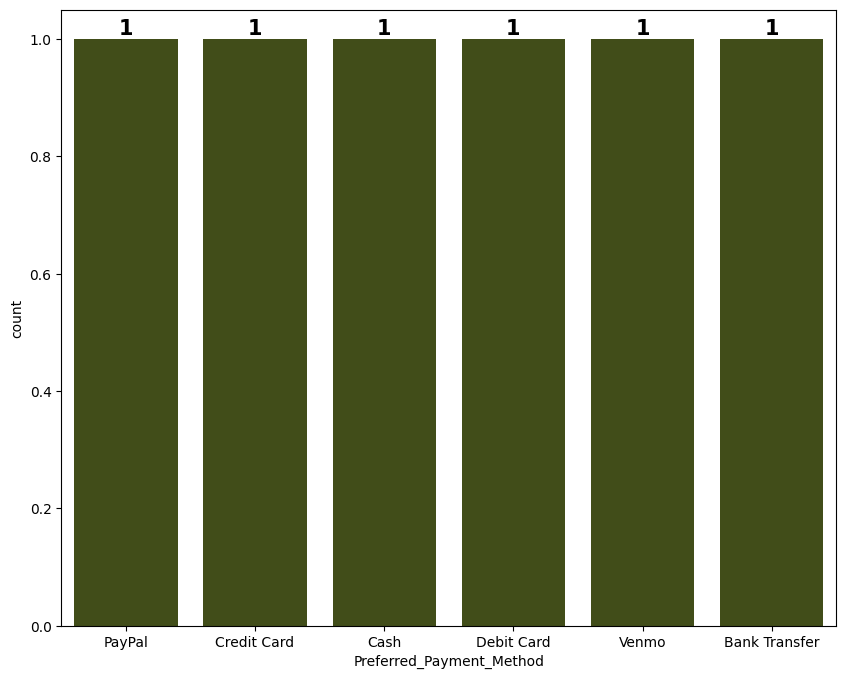

In [106]:
plt.figure(figsize=(10,8))
ax=sns.countplot(data.Preferred_Payment_Method.value_counts(),color="#455511")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.show()

In [107]:
data.Frequency_of_Purchases.value_counts()

Frequency_of_Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

<Axes: xlabel='Frequency_of_Purchases'>

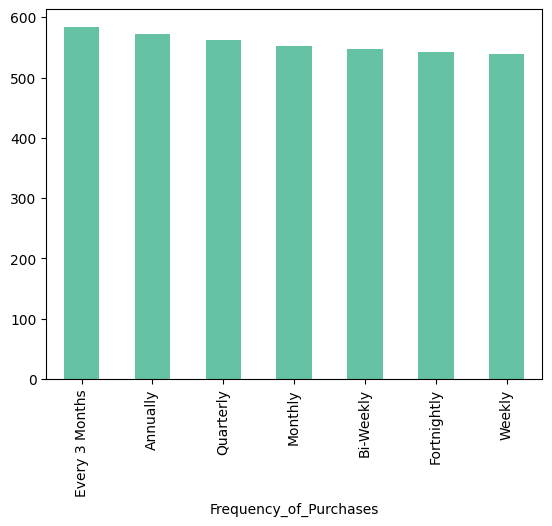

In [108]:
data.Frequency_of_Purchases.value_counts().plot(kind="bar")

In [109]:
data.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [116]:
pd.crosstab(data.Age, data.Gender , values=data.Item_Purchased , aggfunc="sum")

Gender,Female,Male
Age,,
18,SunglassesJeansBackpackSunglassesShortsHandbag...,JacketHoodieDressSocksBeltSweaterBootsShirtSwe...
19,CoatSandalsSunglassesSkirtDressSkirtSunglasses...,SweaterSandalsPantsShortsShoesShoesSweaterShir...
20,BlouseHandbagBeltBlouseBeltGlovesShortsSweater...,CoatJeansScarfPantsGlovesHandbagSandalsSweater...
21,SocksSneakersPantsBootsSneakersBeltHandbagShir...,SandalsPantsCoatShoesHoodieHandbagJeansSkirtCo...
22,JewelryT-shirtShortsCoatSocksDressJeansSweater...,BeltDressHandbagBeltSunglassesScarfHatHoodieSc...
23,ShortsCoatShoesHatGlovesT-shirtSandalsSneakers...,SneakersCoatSandalsSunglassesHoodieShoesJacket...
24,PantsShortsShoesJacketPantsJewelryT-shirtSweat...,HoodieSweaterDressJewelrySneakersT-shirtJacket...
25,SkirtBootsSneakersBackpackScarfJewelryBootsBoo...,SunglassesScarfHatShirtHatDressJacketJewelrySk...
26,SunglassesSkirtBackpackDressBackpackShirtSweat...,CoatHoodieBeltJacketT-shirtJewelryPantsShoesJa...


In [121]:
pd.crosstab(data.Age , data.Location , values=data.Item_Purchased , aggfunc="sum").fillna(0)

Location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Age,,,,,,,,,,,,,,,,,,,,,
18,Shirt,ShirtShorts,0,BeltShortsGloves,0,Dress,0,0,Jacket,DressScarf,...,Skirt,Sandals,HoodieSandalsScarfJacket,Shorts,Socks,Gloves,0,BlouseJeans,Skirt,0
19,SkirtShoesScarf,Sneakers,Sweater,CoatPantsShoes,Belt,0,0,0,Skirt,PantsShoesBootsShirt,...,DressDressDress,Coat,HandbagBlouseHoodie,ShortsJacket,SneakersSweaterT-shirtSweater,ShortsSkirt,ShirtSocks,ShirtGlovesCoatCoat,Jewelry,BackpackSunglassesBelt
20,SkirtPants,BeltBlouse,Handbag,0,Scarf,0,Shirt,0,0,JeansBackpack,...,Gloves,CoatSocksSkirt,0,Hat,T-shirtPantsShorts,0,Belt,Handbag,ShortsBootsBlouseHandbag,PantsSweater
21,ShortsDress,SocksBackpack,0,HandbagJewelry,JeansDressPants,Sneakers,Scarf,SocksPants,Jewelry,Jewelry,...,Blouse,SweaterGloves,0,0,Sneakers,ShoesShirt,Dress,CoatShirtCoat,ShirtBelt,HandbagCoat
22,BeltSweater,0,Jeans,Dress,ScarfJeansBackpackT-shirt,0,0,Dress,Shirt,Sandals,...,0,SandalsSkirt,SocksHat,Pants,0,ScarfShorts,Handbag,T-shirt,0,0
23,SunglassesShirt,0,Jacket,SneakersCoatJeans,SneakersShorts,0,HandbagHoodie,Gloves,Sweater,Socks,...,Boots,SunglassesGloves,0,0,Backpack,0,PantsDress,GlovesJewelry,Gloves,Jeans
24,PantsCoatBlouseShoes,ScarfBlouse,Sneakers,Hoodie,HandbagT-shirt,0,0,Scarf,Sandals,Shorts,...,Backpack,Gloves,ShirtBackpackSweater,JeansShirtT-shirt,BeltSweater,SkirtSneakersShortsJacket,Coat,Skirt,T-shirtBelt,0
25,SunglassesHatSandals,Shorts,Backpack,JacketPantsHat,ShortsSunglassesGlovesSkirt,SkirtSkirt,ShirtBootsJewelrySandals,Blouse,0,BackpackSneakers,...,SkirtSneakers,Scarf,Scarf,JewelryBoots,SkirtDressSunglasses,Hat,BlouseSocks,SandalsSandals,Sweater,BackpackHoodieSneakers
26,Coat,0,DressCoat,0,BeltBackpack,HatGloves,HoodieSunglassesGloves,0,SocksSkirtSkirt,BackpackDress,...,JacketJeansBackpackScarf,Pants,Pants,ShoesShoesDress,ShoesBackpack,HatShirtShoesSocksBackpack,JeansJewelry,CoatSkirt,Hat,Sunglasses


In [7]:
pd.crosstab([data.Payment_Method , data.Location] ,data.Age, values=data.Item_Purchased , aggfunc="sum").fillna(0)

Age                               18 19            20        21       22  \
Payment_Method Location                                                    
Bank Transfer  Alabama         Shirt  0             0         0        0   
               Alaska         Shorts  0             0  Backpack        0   
               Arizona             0  0       Handbag         0        0   
               Arkansas         Belt  0             0         0        0   
               California          0  0             0     Pants  T-shirt   
...                              ... ..           ...       ...      ...   
Venmo          Virginia            0  0             0         0        0   
               Washington          0  0             0     Dress        0   
               West Virginia       0  0             0         0        0   
               Wisconsin           0  0       Handbag     Shirt        0   
               Wyoming             0  0  PantsSweater      Coat        0   

Age                                23              24              25    26  \
Payment_Method Location                                                       
Bank Transfer  Alabama              0           Shoes             Hat     0   
               Alaska               0               0          Shorts     0   
               Arizona         Jacket               0               0  Coat   
               Arkansas         Jeans          Hoodie               0     0   
               California           0  HandbagT-shirt               0     0   
...                               ...             ...             ...   ...   
Venmo          Virginia             0               0               0   Hat   
               Washington           0               0               0     0   
               West Virginia  Jewelry               0               0  Coat   
               Wisconsin            0         T-shirt               0     0   
               Wyoming              0               0  BackpackHoodie     0   

Age                                      27  ...       61      62     63  \
Payment_Method Location                      ...                           
Bank Transfer  Alabama                    0  ...  Handbag  Hoodie    Hat   
               Alaska                     0  ...        0       0      0   
               Arizona        SandalsShorts  ...        0       0      0   
               Arkansas                   0  ...        0   Socks      0   
               California             Shirt  ...        0       0      0   
...                                     ...  ...      ...     ...    ...   
Venmo          Virginia          BootsJeans  ...   Shorts       0  Shirt   
               Washington                 0  ...        0   Boots      0   
               West Virginia              0  ...        0       0  Shoes   
               Wisconsin                  0  ...        0       0      0   
               Wyoming                    0  ...        0       0      0   

Age                               64            65       66       67     68  \
Payment_Method Location                                                       
Bank Transfer  Alabama             0       Handbag        0        0      0   
               Alaska              0             0   Hoodie        0  Shoes   
               Arizona             0             0    Scarf        0      0   
               Arkansas        Shoes  DressSweater        0    Dress      0   
               California          0             0    Shirt        0      0   
...                              ...           ...      ...      ...    ...   
Venmo          Virginia            0             0        0  Handbag      0   
               Washington          0             0        0        0      0   
               West Virginia       0             0        0        0      0   
               Wisconsin           0             0  Jewelry        0      0   
               Wyoming        Jacket          

In [10]:
data.head( )

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [12]:
data.groupby(["Age" , "Item_Purchased"]).Purchase_Amount_USD.mean().unstack().fillna(0)

Item_Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Age,,,,,,,,,,,,,,,,,,,,,
18,94.000000,48.000000,56.000000,79.000000,51.600000,51.200000,54.750000,60.000000,31.000000,25.000000,...,46.000000,61.833333,0.000000,62.000000,64.750000,58.666667,75.600000,80.333333,74.000000,64.000000
19,52.500000,66.000000,75.000000,85.000000,71.000000,72.800000,57.000000,49.500000,70.500000,64.000000,...,63.333333,83.500000,66.600000,59.333333,50.333333,44.750000,40.500000,62.000000,57.500000,37.500000
20,63.000000,55.166667,61.750000,61.000000,64.000000,49.000000,69.000000,36.250000,20.000000,40.000000,...,50.000000,61.666667,28.000000,87.500000,63.200000,48.000000,33.000000,0.000000,63.333333,34.500000
21,55.500000,65.250000,56.000000,65.000000,63.500000,69.250000,94.000000,53.500000,57.400000,68.500000,...,90.000000,68.666667,92.000000,46.000000,94.000000,55.500000,52.333333,84.000000,48.666667,68.400000
22,33.000000,50.333333,47.000000,0.000000,79.000000,63.000000,65.500000,78.200000,54.500000,46.000000,...,80.250000,42.666667,52.333333,90.000000,35.000000,84.000000,47.000000,56.333333,53.666667,74.250000
23,30.000000,0.000000,0.000000,72.500000,55.200000,78.333333,65.833333,78.500000,50.666667,75.000000,...,69.500000,22.000000,30.000000,40.166667,47.500000,54.000000,45.000000,64.000000,45.666667,84.333333
24,48.000000,60.600000,63.250000,0.000000,65.000000,81.000000,82.333333,58.333333,45.000000,49.333333,...,61.000000,68.500000,40.000000,49.250000,48.000000,97.500000,62.000000,0.000000,53.600000,77.833333
25,71.250000,35.000000,47.666667,65.666667,53.500000,63.750000,70.000000,21.000000,52.500000,39.500000,...,65.800000,69.000000,0.000000,77.285714,61.000000,73.166667,55.000000,66.250000,60.500000,92.000000
26,65.400000,54.333333,76.500000,55.000000,60.800000,83.000000,75.000000,0.000000,68.750000,47.500000,...,62.000000,42.000000,87.800000,0.000000,49.666667,0.000000,28.000000,75.000000,41.250000,80.000000


In [16]:
data.groupby(["Location" ,"Gender" ,"Size"]).Age.mean().unstack()

Size                          L          M          S         XL
Location      Gender                                            
Alabama       Female  42.500000  52.222222  38.750000  42.000000
              Male    43.923077  41.533333  45.000000  54.000000
Alaska        Female  45.400000  41.125000  42.000000  28.333333
              Male    45.000000  43.869565  52.555556  31.000000
Arizona       Female  38.600000  47.500000  50.500000  62.000000
...                         ...        ...        ...        ...
West Virginia Male    42.250000  43.173913  43.583333  32.000000
Wisconsin     Female  53.454545  33.100000  45.666667  64.000000
              Male    43.500000  48.400000  46.444444  47.571429
Wyoming       Female  44.500000  40.800000  55.750000  31.000000
              Male    46.363636  41.952381  41.000000  37.714286

[100 rows x 4 columns]

In [18]:
data.groupby(["Location" ,"Gender" ,"Size" ,"Season"]).Age.mean().unstack().fillna(0)

Season                     Fall  Spring     Summer     Winter
Location Gender Size                                         
Alabama  Female L     56.000000    44.0  19.000000  43.333333
                M     52.000000    37.5  61.000000  56.333333
                S     36.000000    35.0   0.000000  49.000000
                XL    52.000000     0.0  43.000000  36.500000
         Male   L     45.666667    46.0  45.428571  24.000000
...                         ...     ...        ...        ...
Wyoming  Female XL    25.000000    37.0   0.000000   0.000000
         Male   L     33.000000    54.2  45.500000  41.000000
                M     42.142857    37.0  40.750000  47.600000
                S     25.000000    40.5  27.000000  51.500000
                XL    19.000000    48.5  63.000000  28.333333

[393 rows x 4 columns]

In [19]:
data.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [22]:
pd.crosstab([data.Review_Rating , data.Gender] ,data.Location , values=data.Age , aggfunc="sum" ).fillna(0)

Location              Alabama  Alaska  Arizona  Arkansas  California  \
Review_Rating Gender                                                   
2.5           Female      0.0   127.0      0.0      45.0        68.0   
              Male        0.0     0.0     42.0       0.0        58.0   
2.6           Female    223.0     0.0    152.0      35.0         0.0   
              Male      179.0    42.0     76.0     183.0        29.0   
2.7           Female      0.0    79.0    119.0      39.0         0.0   
              Male       43.0    37.0     88.0      57.0       166.0   
2.8           Female     40.0     0.0      0.0      45.0         0.0   
              Male      155.0    31.0     59.0     185.0         0.0   
2.9           Female      0.0    24.0     68.0      70.0         0.0   
              Male       61.0   225.0    158.0      73.0        85.0   
3.0           Female     67.0     0.0      0.0      66.0       252.0   
              Male       37.0   107.0     52.0      66.0        85.0   
3.1           Female     80.0    28.0    102.0      19.0        52.0   
              Male      115.0     0.0    102.0     165.0        98.0   
3.2           Female    124.0     0.0     58.0       0.0        22.0   
              Male      117.0   167.0    126.0      25.0       203.0   
3.3           Female     57.0    93.0     62.0      98.0        51.0   
              Male       86.0    21.0      0.0       0.0       120.0   
3.4           Female      0.0     0.0     56.0     125.0       225.0   
              Male      131.0   205.0    113.0     213.0         0.0   
3.5           Female      0.0    75.0      0.0      41.0        81.0   
              Male       74.0    98.0      0.0      66.0       121.0   
3.6           Female     40.0     0.0     51.0       0.0         0.0   
              Male       55.0     0.0     31.0       0.0       174.0   
3.7           Female     58.0    29.0     45.0      53.0        28.0   
              Male       88.0     0.0    101.0     123.0       146.0   
3.8           Female      0.0     0.0     46.0       0.0         0.0   
              Male      148.0    29.0     40.0      72.0        53.0   
3.9           Female      0.0   122.0      0.0       0.0         0.0   
              Male       58.0   148.0     56.0     199.0       114.0   
4.0           Female      0.0     0.0     27.0       0.0       142.0   
              Male       78.0     0.0     66.0     152.0       125.0   
4.1           Female      0.0    19.0      0.0      58.0         0.0   
              Male      233.0    32.0      0.0      87.0        47.0   
4.2           Female    121.0    50.0    111.0       0.0        82.0   
              Male      107.0   165.0     70.0      86.0        77.0   
4.3           Female     99.0     0.0     28.0     126.0        63.0   
              Male      163.0   158.0     75.0      62.0       126.0   
4.4           Female      0.0    27.0     70.0      65.0        35.0   
              Male      186.0    67.0    162.0      71.0       112.0   
4.5           Female    101.0    62.0      0.0       0.0        61.0   
              Male       58.0   160.0     19.0     181.0       117.0   
4.6           Female      0.0    61.0    119.0      83.0         0.0   
              Male       25.0   227.0    105.0      71.0        95.0   
4.7           Female     62.0    31.0      0.0      86.0        93.0   
              Male      189.0   110.0     57.0      69.0       263.0   
4.8           Female     96.0    68.0     34.0      29.0        24.0   
              Male      128.0    67.0     69.0      62.0         0.0   
4.9           Female     50.0     0.0      0.0       0.0        58.0   
              Male      109.0     0.0    128.0     101.0       118.0   
5.0           Female      0.0    41.0      0.0       0.0         0.0   
              Male      103.0    64.0      0.0      32.0       184.0   

Location              Colorado  Connecticut  Delaware  Florida  Georgia  ...  \
Review_Rating Gender           

In [24]:
pd.crosstab([data.Age ,data.Gender],data.Item_Purchased , values=data.Shipping_Type , aggfunc="sum").fillna(0)

Item_Purchased                                  Backpack  \
Age Gender                                                 
18  Female                                  Store Pickup   
    Male                                               0   
19  Female                                      Standard   
    Male        2-Day ShippingStore Pickup2-Day Shipping   
20  Female                                             0   
...                                                  ...   
68  Male                                    Next Day Air   
69  Female                                             0   
    Male                Next Day AirStore PickupStandard   
70  Female                                             0   
    Male                                               0   

Item_Purchased                                             Belt  \
Age Gender                                                        
18  Female                                        Free Shipping   
    Male                                               Standard   
19  Female                                                    0   
    Male        2-Day ShippingStandardStore PickupFree Shipping   
20  Female                             Next Day AirNext Day Air   
...                                                         ...   
68  Male                                           Next Day Air   
69  Female                                        Free Shipping   
    Male                                  2-Day ShippingExpress   
70  Female       StandardNext Day AirFree ShippingFree Shipping   
    Male                                   StandardNext Day Air   

Item_Purchased                       Blouse  \
Age Gender                                    
18  Female                                0   
    Male        2-Day ShippingFree Shipping   
19  Female                  ExpressStandard   
    Male               ExpressFree Shipping   
20  Female         Next Day AirNext Day Air   
...                                     ...   
68  Male           Next Day AirNext Day Air   
69  Female                          Express   
    Male              Free ShippingStandard   
70  Female                     Next Day Air   
    Male                           Standard   

Item_Purchased                               Boots  \
Age Gender                                           
18  Female                                Standard   
    Male                      ExpressFree Shipping   
19  Female                                       0   
    Male                             Free Shipping   
20  Female                                       0   
...                                            ...   
68  Male                  StandardStandardStandard   
69  Female                                       0   
    Male                 Free ShippingStore Pickup   
70  Female                                       0   
    Male        Standard2-Day ShippingStore Pickup   

Item_Purchased                                               Coat  \
Age Gender                                                          
18  Female                                                Express   
    Male        Free ShippingStore Pickup2-Day ShippingNext Da...   
19  Female      2-Day Shipping2-Day ShippingNext Day AirFree S...   
    Male                                    StandardFree Shipping   
20  Female                                                      0   
...                                                           ...   
68  Male                                             Next Day Air   
69  Female                                                      0   
    Male                                                  Express   
70  Female                                                      0   
    Male                                      Store PickupExpress   

Item_Purchased                                       Dress  \
Age Gender                                                   
18  Female

In [25]:
data.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [27]:
pd.crosstab(data.Age , data.Category , values=data.Previous_Purchases ,aggfunc="mean")

Category,Accessories,Clothing,Footwear,Outerwear
Age,,,,
18,21.500000,19.030303,21.750000,26.200000
19,27.280000,24.083333,19.666667,24.750000
20,23.062500,23.428571,24.375000,19.333333
21,22.700000,25.085714,26.444444,16.000000
22,25.000000,25.827586,24.000000,40.000000
23,29.631579,21.482759,26.000000,25.555556
24,27.736842,22.512821,32.250000,29.166667
25,26.866667,28.666667,25.777778,19.250000
26,25.375000,26.555556,12.900000,24.000000


In [33]:
pd.crosstab([data.Age , data.Gender] , data.Location  , values=data.Promo_Code_Used , aggfunc="sum").fillna(0)

Location   Alabama Alaska Arizona  Arkansas California Colorado Connecticut  \
Age Gender                                                                    
18  Female       0     No       0         0          0        0           0   
    Male       Yes    Yes       0  YesYesNo          0      Yes           0   
19  Female      No     No       0        No          0        0           0   
    Male     YesNo      0     Yes     YesNo         No        0           0   
20  Female       0     No      No         0          0        0           0   
...            ...    ...     ...       ...        ...      ...         ...   
68  Male         0    Yes       0         0          0      Yes       YesNo   
69  Female       0      0       0         0          0     NoNo           0   
    Male         0    Yes      No       Yes       NoNo        0       YesNo   
70  Female       0      0      No        No          0        0           0   
    Male         0    Yes     Yes         0        Yes      Yes       YesNo   

Location   Delaware Florida    Georgia  ... South Dakota Tennessee   Texas  \
Age Gender                              ...                                  
18  Female        0       0          0  ...            0         0    NoNo   
    Male          0     Yes      YesNo  ...          Yes        No   YesNo   
19  Female        0      No         No  ...           No         0  NoNoNo   
    Male          0       0  YesYesYes  ...         NoNo       Yes       0   
20  Female        0       0          0  ...            0         0       0   
...             ...     ...        ...  ...          ...       ...     ...   
68  Male     YesYes     Yes  YesYesYes  ...          Yes       Yes       0   
69  Female        0       0          0  ...           No         0      No   
    Male          0       0        Yes  ...       YesYes         0     Yes   
70  Female        0       0          0  ...           No         0      No   
    Male          0      No          0  ...          Yes         0  YesYes   

Location   Utah   Vermont Virginia Washington West Virginia Wisconsin Wyoming  
Age Gender                                                                     
18  Female   No         0        0          0            No         0       0  
    Male      0        No      Yes          0            No       Yes       0  
19  Female   No        No       No          0          NoNo        No       0  
    Male    Yes  YesYesNo      Yes       NoNo        YesYes         0  NoNoNo  
20  Female    0        No        0          0             0      NoNo      No  
...         ...       ...      ...        ...           ...       ...     ...  
68  Male    Yes       Yes        0          0             0   YesNoNo       0  
69  Female    0         0        0       NoNo             0        No       0  
    Male      0    NoNoNo        0  YesNoNoNo             0     YesNo      No  
70  Female   No         0       No          0            No        No       0  
    Male      0   YesNoNo        0        Yes             0         0       0  

[106 rows x 50 columns]

In [37]:
pd.crosstab([data.Age , data.Gender ,data.Item_Purchased] , data.Location  , values=data.Discount_Applied , aggfunc="sum").fillna(0)

Location                  Alabama Alaska Arizona Arkansas California Colorado  \
Age Gender Item_Purchased                                                       
18  Female Backpack             0      0       0        0          0        0   
           Belt                 0      0       0        0          0        0   
           Boots                0      0       0        0          0        0   
           Coat                 0      0       0        0          0        0   
           Dress                0      0       0        0          0        0   
...                           ...    ...     ...      ...        ...      ...   
70  Male   Shorts               0      0       0        0          0        0   
           Skirt                0      0       0        0          0        0   
           Sneakers             0      0       0        0          0      Yes   
           Socks                0      0       0        0          0        0   
           Sweater              0      0       0        0        Yes        0   

Location                  Connecticut Delaware Florida Georgia  ...  \
Age Gender Item_Purchased                                       ...   
18  Female Backpack                 0        0       0       0  ...   
           Belt                     0        0       0       0  ...   
           Boots                    0        0       0       0  ...   
           Coat                     0        0       0       0  ...   
           Dress                    0        0       0       0  ...   
...                               ...      ...     ...     ...  ...   
70  Male   Shorts                   0        0       0       0  ...   
           Skirt                    0        0       0       0  ...   
           Sneakers                 0        0       0       0  ...   
           Socks                    0        0       0       0  ...   
           Sweater                  0        0       0       0  ...   

Location                  South Dakota Tennessee Texas Utah Vermont Virginia  \
Age Gender Item_Purchased                                                      
18  Female Backpack                  0         0     0    0       0        0   
           Belt                      0         0     0    0       0        0   
           Boots                     0         0     0    0       0        0   
           Coat                      0         0     0    0       0        0   
           Dress                     0         0     0    0       0        0   
...                                ...       ...   ...  ...     ...      ...   
70  Male   Shorts                    0         0     0    0       0        0   
           Skirt                     0         0     0    0       0        0   
           Sneakers                  0         0     0    0       0        0   
           Socks                     0         0     0    0       0        0   
           Sweater                   0         0     0    0       0        0   

Location                  Washington West Virginia Wisconsin Wyoming  
Age Gender Item_Purchased                                             
18  Female Backpack                0             0         0       0  
           Belt                    0             0         0       0  
           Boots                   0             0         0       0  
           Coat                    0             0         0       0  
           Dress                   0             0         0       0  
...                              ...           ...       ...     ...  
70  Male   Shorts                  0             0         0       0  
           Skirt                   0             0         0       0  
           Sneakers              Yes             0         0       0  
           Socks                   0             0         0       0  
           Sweater                 0             0         0       0  

[1962 rows x 50 columns]

In [38]:
pd.crosstab([data.Age , data.Gender ,data.Item_Purchased] , data.Location  , values=data.Preferred_Payment_Method , aggfunc="sum").fillna(0)

Location                  Alabama Alaska Arizona Arkansas California  \
Age Gender Item_Purchased                                              
18  Female Backpack             0      0       0        0          0   
           Belt                 0      0       0        0          0   
           Boots                0      0       0        0          0   
           Coat                 0      0       0        0          0   
           Dress                0      0       0        0          0   
...                           ...    ...     ...      ...        ...   
70  Male   Shorts               0      0       0        0          0   
           Skirt                0      0       0        0          0   
           Sneakers             0      0       0        0          0   
           Socks                0      0       0        0          0   
           Sweater              0      0       0        0      Venmo   

Location                     Colorado Connecticut Delaware Florida Georgia  \
Age Gender Item_Purchased                                                    
18  Female Backpack                 0           0        0       0       0   
           Belt                     0           0        0       0       0   
           Boots                    0           0        0       0       0   
           Coat                     0           0        0       0       0   
           Dress                    0           0        0       0       0   
...                               ...         ...      ...     ...     ...   
70  Male   Shorts                   0           0        0       0       0   
           Skirt                    0           0        0       0       0   
           Sneakers        Debit Card           0        0       0       0   
           Socks                    0           0        0       0       0   
           Sweater                  0           0        0       0       0   

Location                   ... South Dakota Tennessee Texas Utah Vermont  \
Age Gender Item_Purchased  ...                                             
18  Female Backpack        ...            0         0     0    0       0   
           Belt            ...            0         0     0    0       0   
           Boots           ...            0         0     0    0       0   
           Coat            ...            0         0     0    0       0   
           Dress           ...            0         0     0    0       0   
...                        ...          ...       ...   ...  ...     ...   
70  Male   Shorts          ...            0         0     0    0       0   
           Skirt           ...            0         0     0    0       0   
           Sneakers        ...            0         0     0    0       0   
           Socks           ...            0         0     0    0       0   
           Sweater         ...            0         0     0    0       0   

Location                  Virginia   Washington West Virginia Wisconsin  \
Age Gender Item_Purchased                                                 
18  Female Backpack              0            0             0         0   
           Belt                  0            0             0         0   
           Boots                 0            0             0         0   
           Coat                  0            0             0         0   
           Dress                 0            0             0         0   
...                            ...          ...           ...       ...   
70  Male   Shorts                0            0             0         0   
           Skirt                 0            0             0         0   
           Sneakers              0  Credit Card             0         0   
           Socks                 0            0             0         0   
           Sweater               0            0             0         0   

Location                  Wyoming  
Age Gender Item_Purchased          
18  Female 

In [39]:
data.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [40]:
pd.crosstab([data.Age , data.Gender ,data.Item_Purchased] , data.Location  , values=data.Color , aggfunc="sum").fillna(0)

Location                  Alabama Alaska Arizona Arkansas California Colorado  \
Age Gender Item_Purchased                                                       
18  Female Backpack             0      0       0        0          0        0   
           Belt                 0      0       0        0          0        0   
           Boots                0      0       0        0          0        0   
           Coat                 0      0       0        0          0        0   
           Dress                0      0       0        0          0        0   
...                           ...    ...     ...      ...        ...      ...   
70  Male   Shorts               0      0       0        0          0        0   
           Skirt                0      0       0        0          0        0   
           Sneakers             0      0       0        0          0  Magenta   
           Socks                0      0       0        0          0        0   
           Sweater              0      0       0        0      Beige        0   

Location                  Connecticut Delaware Florida Georgia  ...  \
Age Gender Item_Purchased                                       ...   
18  Female Backpack                 0        0       0       0  ...   
           Belt                     0        0       0       0  ...   
           Boots                    0        0       0       0  ...   
           Coat                     0        0       0       0  ...   
           Dress                    0        0       0       0  ...   
...                               ...      ...     ...     ...  ...   
70  Male   Shorts                   0        0       0       0  ...   
           Skirt                    0        0       0       0  ...   
           Sneakers                 0        0       0       0  ...   
           Socks                    0        0       0       0  ...   
           Sweater                  0        0       0       0  ...   

Location                  South Dakota Tennessee Texas Utah Vermont Virginia  \
Age Gender Item_Purchased                                                      
18  Female Backpack                  0         0     0    0       0        0   
           Belt                      0         0     0    0       0        0   
           Boots                     0         0     0    0       0        0   
           Coat                      0         0     0    0       0        0   
           Dress                     0         0     0    0       0        0   
...                                ...       ...   ...  ...     ...      ...   
70  Male   Shorts                    0         0     0    0       0        0   
           Skirt                     0         0     0    0       0        0   
           Sneakers                  0         0     0    0       0        0   
           Socks                     0         0     0    0       0        0   
           Sweater                   0         0     0    0       0        0   

Location                  Washington West Virginia Wisconsin Wyoming  
Age Gender Item_Purchased                                             
18  Female Backpack                0             0         0       0  
           Belt                    0             0         0       0  
           Boots                   0             0         0       0  
           Coat                    0             0         0       0  
           Dress                   0             0         0       0  
...                              ...           ...       ...     ...  
70  Male   Shorts                  0             0         0       0  
           Skirt                   0             0         0       0  
           Sneakers            Beige             0         0       0  
           Socks                   0             0         0       0  
           Sweater                 0             0         0       0  

[1962 rows x 50 columns]

In [47]:
pd.crosstab([data.Age , data.Gender ],data.Category,values=data.Location , aggfunc="sum")

Category                                          Accessories  \
Age Gender                                                      
18  Female  NebraskaPennsylvaniaNevadaNebraskaNorth Caroli...   
    Male    ArkansasLouisianaVirginiaMichiganArkansasGeorg...   
19  Female  PennsylvaniaMarylandNew YorkTexasKentuckyIowaA...   
    Male    NebraskaNew YorkMinnesotaNebraskaWest Virginia...   
20  Female          WisconsinNevadaMississippiNebraskaArizona   
...                                                       ...   
68  Male    MissouriIdahoLouisianaUtahNorth CarolinaHawaii...   
69  Female  Rhode IslandNorth CarolinaKentuckySouth Dakota...   
    Male    LouisianaNew YorkConnecticutOhioKentuckyArkans...   
70  Female  PennsylvaniaSouth DakotaNew JerseyUtahLouisian...   
    Male    IndianaNevadaAlaskaIndianaMinnesotaNorth Carol...   

Category                                             Clothing  \
Age Gender                                                      
18  Female  West VirginiaAlaskaMontanaIllinoisUtahKansasOk...   
    Male    TexasGeorgiaNew HampshireIllinoisAlaskaOregonM...   
19  Female  VirginiaOhioFloridaTexasGeorgiaIowaNew JerseyT...   
    Male    MaineGeorgiaVirginiaArizonaNew YorkWest Virgin...   
20  Female  WisconsinAlaskaVermontMassachusettsWyomingPenn...   
...                                                       ...   
68  Male    New JerseyGeorgiaGeorgiaVermontMarylandNorth C...   
69  Female  LouisianaNevadaIllinoisNevadaColoradoKansasWas...   
    Male    MissouriNorth CarolinaMissouriSouth DakotaMary...   
70  Female  LouisianaArkansasWisconsinWest VirginiaArizona...   
    Male    ArizonaMontanaNew JerseyVermontNevadaCaliforni...   

Category                                             Footwear  \
Age Gender                                                      
18  Female                                           Missouri   
    Male    OhioIllinoisSouth CarolinaMinnesotaTennesseeId...   
19  Female                            MinnesotaArkansasAlaska   
    Male    New YorkNew JerseyGeorgiaNevadaNevadaVermontGe...   
20  Female                                             Oregon   
...                                                       ...   
68  Male    ColoradoGeorgiaConnecticutNevadaFloridaAlaskaD...   
69  Female                                            Montana   
    Male            MaineTexasSouth DakotaMontanaMichiganOhio   
70  Female                       TexasMichiganMinnesotaOregon   
    Male    OhioColoradoWashingtonTexasMissouriPennsylvani...   

Category                                            Outerwear  
Age Gender                                                     
18  Female                                      KentuckyTexas  
    Male    FloridaOklahomaMississippiIowaMarylandPennsylv...  
19  Female  MississippiUtahWest VirginiaNew YorkWest Virginia  
    Male                            OklahomaArkansasTennessee  
20  Female                                                NaN  
...                                                       ...  
68  Male       MichiganOregonWisconsinTennesseeNorth Carolina  
69  Female                                      WisconsinOhio  
    Male                   North DakotaMichiganSouth Carolina  
70  Female                                                NaN  
    Male        MassachusettsSouth DakotaMassachusettsFlorida  

[106 rows x 4 columns]

In [55]:
pd.crosstab(data.Age ,data.Location , values=data.Season , aggfunc="sum").fillna(0)

Location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Age,,,,,,,,,,,,,,,,,,,,,
18,Summer,SpringSpring,0,SpringWinterSpring,0,Spring,0,0,Fall,WinterWinter,...,Winter,Winter,SummerSpringFallFall,Fall,Winter,Winter,0,SpringWinter,Summer,0
19,FallSpringSummer,Spring,Fall,WinterFallWinter,Winter,0,0,0,Winter,SpringSpringFallWinter,...,FallSummerWinter,Summer,FallFallWinter,SummerWinter,SpringWinterSummerFall,WinterSpring,FallSpring,SummerWinterSpringSummer,Spring,FallSpringFall
20,WinterSpring,SpringSpring,Spring,0,Spring,0,Summer,0,0,WinterWinter,...,Summer,SpringSpringFall,0,Summer,SpringFallSpring,0,Spring,Summer,SpringWinterFallFall,SpringFall
21,FallFall,SpringFall,0,SpringWinter,WinterWinterSpring,Summer,Spring,WinterWinter,Summer,Spring,...,Spring,WinterSpring,0,0,Fall,WinterWinter,Spring,SummerFallSummer,SummerFall,WinterWinter
22,FallSpring,0,Winter,Fall,SpringSummerSummerWinter,0,0,Summer,Summer,Summer,...,0,SpringWinter,SpringFall,Fall,0,SpringWinter,Summer,Summer,0,0
23,WinterFall,0,Winter,SummerSpringFall,SpringSummer,0,SpringSpring,Summer,Fall,Fall,...,Winter,SummerSpring,0,0,Spring,0,WinterSummer,WinterWinter,Winter,Fall
24,SummerSpringWinterSpring,FallWinter,Fall,Winter,SummerFall,0,0,Fall,Summer,Spring,...,Spring,Fall,SummerSummerSummer,WinterSummerSpring,WinterWinter,WinterWinterWinterSpring,Winter,Spring,SummerWinter,0
25,SpringSummerSpring,Spring,Summer,SpringSummerSummer,SpringSpringSpringSpring,FallSpring,FallSummerWinterSpring,Spring,0,SpringWinter,...,FallFall,Fall,Winter,WinterFall,FallSpringWinter,Winter,SpringFall,WinterFall,Summer,FallSummerFall
26,Fall,0,WinterSpring,0,WinterSummer,SpringWinter,WinterWinterFall,0,SummerWinterWinter,SpringFall,...,FallSummerSummerFall,Summer,Winter,SummerWinterSummer,SpringSummer,SummerSummerFallSummerSummer,FallSpring,SummerSummer,Fall,Summer


In [56]:
data.to_csv("shopping_trends_update" , index=False , encoding="utf-8") 